# Project: Data Wrangling

In [1]:
#Required Packages for the project
import zipfile
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import datetime
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import requests

## Data Gathering
### Introduction
> In this stage we will have to gather data required for the project. In our case we will be working on the welovegogs twitter data. In this project we have three data sets to import, a csv, a tsv and a json file.
### About Welovedogs
> The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced."

>In this project we shall cleean the date for quality and tidiness. We shall in the end of cleaning make wonderful insights about the data and *i'm excited about that*. Let's get busy!!

In [2]:
tweet_archieve = pd.read_csv("twitter-archive-enhanced.csv")
tweet_archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


>Here we have been able to import the downloaded `twitter-archive-enhanced.csv` data and viewed it for confirmation. *winks*

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# We have to save it to an TSV file called image_predictions.tsv
with open("image_predictions.tsv", mode="wb") as file:
    file.write(response.content)

In [4]:
# now lets read the file using pandas
image_pred = pd.read_csv("image_predictions.tsv", sep="\t")
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


>We have also loaded the `tsv` file from the url provided and saved it into `image_predictions.tsv` file.

In [5]:
# set a function for tweet extraction
# file already created so no need to execute to continue the notebook
def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [6]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [7]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
tweet_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


> After a hard fought journey to import our final data!! `EUREKA`

>The codes were provided for us because we couldnt get assess from the twitter. This file was the seperated into three columns `id_str retweet_count and favorite_count`. and finally viewed again for confirmation.

## Assessing the data

> This was very insightful as one really needs a third eye to find the messy and dirty areas in the data. I assessed the data `visually and programmatically` and found some huge pile of dirt ready to be cleaned.

In [8]:
tweet_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [11]:
tweet_archieve.name.value_counts().head(60)

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
an            7
Toby          7
Bailey        7
Buddy         7
Daisy         7
Stanley       6
Koda          6
Leo           6
Bella         6
Scout         6
Rusty         6
Dave          6
Jax           6
Milo          6
Jack          6
Oscar         6
Louis         5
Bentley       5
Sunny         5
Finn          5
George        5
Alfie         5
Sammy         5
Chester       5
Oakley        5
Gus           5
Phil          5
very          5
Larry         5
Brody         4
Reggie        4
Sampson       4
Jerry         4
Bear          4
one           4
Maximus       4
Beau          4
Bruce         4
Luna          4
Derek         4
Reginald      4
Loki          4
just          4
Jeffrey       4
Riley         4
Scooter       4
quite         4
Name: name, dtype: int64

In [12]:
doggo = tweet_archieve.doggo.value_counts().head(10)
floofer = tweet_archieve.floofer.value_counts().head(10)
pupper = tweet_archieve.pupper.value_counts().head(10)
puppo = tweet_archieve.puppo.value_counts().head(10)

In [13]:
doggo

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
floofer

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
pupper

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
puppo

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
tweet_archieve[tweet_archieve.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
image_pred[image_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


# Quality issues

### Tweet_archive

- Drop some features that are not needed
- Erroneous datatype
- Lower case names for names
- Mistakes on dog ratings
- Replace unidentified names into `none`

### Tweet_count
- Fix column name from id_str to tweet_id
- Erroneous datatype

### Image_pred
- Drop likely predictions that are not true(meaning they are not dogs)

# Tidiness
### Tweet_archive
- Rating should be in a single column
- Clean up text column by taking out the url at the end of some text


### All Datasets
- merging tables

## Cleaning Data

> Welcome to the cleaning section of our project after we have successfully assessed our data and found some issues that require cleaning and these will be taken care of as we move on.

>First we need to make a copy of the original collected datasets

In [20]:
#Making a copy of the original data collected
image_pred_clean = image_pred.copy()
tweet_archieve_clean = tweet_archieve.copy()
tweet_count_clean = tweet_count.copy()

### Issue #1: Drop some features that are not needed

#### Define:
> We shall use the drop fuction to remove some features that are not needed at the moments("in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp")

#### Code

In [21]:
tweet_archieve_clean = tweet_archieve_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)
tweet_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


> We now have 12 columns to work with

### Issue #2: Erroneous datatype

#### Define:
> we will use the astype function to change datatypes
`timestamp to datetime64` and `name, text, doggo, floofler, pupper, puppo, id_str to string`

#### Code

In [22]:
#changing datatypes
tweet_archieve_clean[['timestamp']] = tweet_archieve_clean[['timestamp']].astype('datetime64')
tweet_archieve_clean[['name']] = tweet_archieve_clean[['name']].astype('string')
tweet_archieve_clean[['text']] = tweet_archieve_clean[['text']].astype('string')
tweet_archieve_clean[['doggo']] = tweet_archieve_clean[['doggo']].astype('string')
tweet_archieve_clean[['floofer']] = tweet_archieve_clean[['floofer']].astype('string')
tweet_archieve_clean[['pupper']] = tweet_archieve_clean[['pupper']].astype('string')
tweet_archieve_clean[['puppo']] = tweet_archieve_clean[['puppo']].astype('string')
tweet_count_clean[['id_str']] = tweet_count_clean[['id_str']].astype('int64')

In [23]:
tweet_archieve_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   string        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   string        
 8   doggo               2356 non-null   string        
 9   floofer             2356 non-null   string        
 10  pupper              2356 non-null   string        
 11  puppo               2356 non-null   string        
dtypes: datetime64[ns](1), int64(3), object(2), string(6)
memory usage: 221.0+ KB


> With the astype function we have succeeded in changing data types for both the `tweet_archieve_clean` data and `tweet_count_clean` datasets

### Issue #3: Fix column names

#### Define:
> We will apply the rename function to the `id_str` column in the `tweet_count_clean` dataset to be in lne with other id values.

#### Code

In [24]:
tweet_count_clean.rename(index = int, columns={"id_str" : "tweet_id"}, inplace = True)
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6 KB


> After confirmation we noticed the change

### Issue #4: Lower case names for column name

#### Define:
> For cosistency in naming we shall make sure names in `tweet_archieve_clean` and `image_pred` dataset are on lowercases

#### Code

In [25]:
#tweet_archieve
tweet_archieve_clean.name=tweet_archieve_clean.name.str.lower()
tweet_archieve_clean.doggo=tweet_archieve_clean.doggo.str.lower()
tweet_archieve_clean.floofer=tweet_archieve_clean.floofer.str.lower()
tweet_archieve_clean.pupper=tweet_archieve_clean.pupper.str.lower()
tweet_archieve_clean.puppo=tweet_archieve_clean.puppo.str.lower()

#image_pred
image_pred.p1=image_pred.p1.str.lower()
image_pred.p2=image_pred.p2.str.lower()
image_pred.p3=image_pred.p2.str.lower()

### Issue #5: Mistakes on dog ratings

#### Define:
> Mistakes on dog ratings with indexes `(313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335 for mistaken values)` and `(45, 340, 695, 763, 1689, 1712 for mistakes after decimals)`.

> Most of these values were found during visual cleaning of the datasets on excel

#### Code

In [26]:
#finding inconsitent factions from text
tweet_archieve_clean[tweet_archieve_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [27]:
#Confused dog ratings (313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335)
tweet_archieve_clean.iloc[[313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335], [3,5,6]]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
1068,"After so many requests, this is Bretagne. She ...",9,11
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1662,This is Darrel. He just robbed a 7/11 and is i...,7,11
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2


>after assessment of the data we will now change thes values and view them.

In [28]:
#rating mistaken for 960/00
tweet_archieve_clean.iloc[313, 5] = 13
tweet_archieve_clean.iloc[313, 6] = 10

#rating mistaken for a date 11/15/15
tweet_archieve_clean.iloc[342, 5] = 0
tweet_archieve_clean.iloc[342, 6] = 0

#rating mistaken for a date her 24/7 smile
tweet_archieve_clean.iloc[516, 5] = 0
tweet_archieve_clean.iloc[516, 6] = 0

#rating mistaken for 9/11
tweet_archieve_clean.iloc[784, 5] = 14
tweet_archieve_clean.iloc[784, 6] = 10

#rating mistaken for 9/11
tweet_archieve_clean.iloc[1068, 5] = 14
tweet_archieve_clean.iloc[1068, 6] = 10

#rating mistaken for 4/20
tweet_archieve_clean.iloc[1165, 5] = 13
tweet_archieve_clean.iloc[1165, 6] = 10

#rating mistaken for 50/50 split in text
tweet_archieve_clean.iloc[1202, 5] = 11
tweet_archieve_clean.iloc[1202, 6] = 10

#rating mistaken for 7/11 which is name of convience store
tweet_archieve_clean.iloc[1662, 5] = 10
tweet_archieve_clean.iloc[1662, 6] = 10

#rating mistaken for 1/2 half legged
tweet_archieve_clean.iloc[2335, 5] = 9
tweet_archieve_clean.iloc[2335, 6] = 10

#rating mistaken for values after the decimal points
tweet_archieve_clean.iloc[45, 5] = 13.5
tweet_archieve_clean.iloc[695, 5] = 9.75
tweet_archieve_clean.iloc[763, 5] = 11.27
tweet_archieve_clean.iloc[1689, 5] = 9.5
tweet_archieve_clean.iloc[1712, 5] = 11.26

> in this section, we used the `iloc` fuction to locate the indexes with issues and fixed them.

In [29]:
#for confermation
tweet_archieve_clean[tweet_archieve_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.50,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.00,10
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1689,I've been told there's a slight possibility he...,9.50,10
1712,Here we have uncovered an entire battalion of ...,11.26,10


> here we confirmed the changes made

In [30]:
#confirmation
tweet_archieve_clean.iloc[[313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335], [3,5,6]]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,13.0,10
342,@docmisterio account started on 11/15/15,0.0,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,0.0,0
784,"RT @dog_rates: After so many requests, this is...",14.0,10
1068,"After so many requests, this is Bretagne. She ...",14.0,10
1165,Happy 4/20 from the squad! 13/10 for all https...,13.0,10
1202,This is Bluebert. He just saw that both #Final...,11.0,10
1662,This is Darrel. He just robbed a 7/11 and is i...,10.0,10
2335,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10


> here we confirmed the changes made

### Issue #6: # replace the unidentified names into none

#### Define:
> Replace `‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, ‘very’` to `none` on the name column of the `tweet_archieve_clean` dataset  

#### Code

In [31]:
# replace the stopwords into none
unidentified_names = (["a", "all", "an", "by", "his", "just", "my", "not", "such", "the", "this", "very"])


In [32]:
for x in unidentified_names:
    tweet_archieve_clean["name"].replace(x, "none", inplace = True)
tweet_archieve_clean.name.value_counts().head(10)

none       832
charlie     12
cooper      11
lucy        11
oliver      11
penny       10
tucker      10
lola        10
winston      9
bo           9
Name: name, dtype: Int64

### Issue #7: Drop likely predictions that are not true

#### Define:
> We shall replace likely predictions that are not true(meaning they are not dogs) to NAN in the `image_pred` dataset and finally drop the `NAN` values as we are only interested in dog predictions.

#### Code

In [33]:
image_pred_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
image_pred_clean["p1_dog"].replace(False, np.nan, inplace = True)
image_pred_clean["p2_dog"].replace(False, np.nan, inplace = True)
image_pred_clean["p3_dog"].replace(False, np.nan, inplace = True)

In [35]:
#We will apply the drop function to dropthe nan values
image_pred_clean.p1_dog.dropna()
image_pred_clean.p2_dog.dropna()
image_pred_clean.p3_dog.dropna()

0       True
1       True
2       True
3       True
4       True
        ... 
2066    True
2067    True
2070    True
2072    True
2073    True
Name: p3_dog, Length: 1499, dtype: object

### Issue #8: Clean up text column by taking out the url at the end

#### Define:
> We will apply the replace function to the text column and finally remove whitespaces using the strip function

#### Code

In [36]:
#Clean up text column by taking out the url at the end of the text column
tweet_archieve_clean['text'] = tweet_archieve_clean.text.str.replace(r"http\S+", "")
tweet_archieve_clean['text'] = tweet_archieve_clean.text.str.strip()

<ipython-input-36-373cf6b4eb62>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_archieve_clean['text'] = tweet_archieve_clean.text.str.replace(r"http\S+", "")


In [37]:
#checking for the effect of the last line by searching for http in the text column
tweet_archieve_clean.query("text == 'http'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> we have confirmed using the query function that no values starts with http on the text column.

# Tidiness Issues


### Issue #9: Clean up text column by taking out the url at the end

#### Define:
> We will create a new column called rating which will be the division(`rating_numerator/rating_denominator`) on the `tweet_archieve_clean` dataset

#### Code

In [38]:
#Rating should be in a single column
tweet_archieve_clean["rating"] = tweet_archieve_clean["rating_numerator"]/tweet_archieve_clean["rating_denominator"]

In [39]:
tweet_archieve_clean.rating.describe()

count    2354.00000
mean        1.21915
std         4.08167
min         0.00000
25%         1.00000
50%         1.10000
75%         1.20000
max       177.60000
Name: rating, dtype: float64

>For Confirmation

In [40]:
#i think we still have to take out some more columns now(expanded_urls","rating_numerator","rating_denominator")
tweet_archieve_clean = tweet_archieve_clean.drop(["expanded_urls","rating_numerator","rating_denominator"], axis=1)

In [41]:
tweet_archieve_clean.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2


> for confirmation

> `N:B` This is just a side manipulation which will be used in gaining insights later on.

- A new column `tweet_day` was formed from the `timestamp` column in the `tweet_archieve_clean` dataset

In [42]:
#for insights
tweet_archieve_clean["tweet_day"] = tweet_archieve_clean["timestamp"].dt.strftime("%a")

In [43]:
tweet_archieve_clean["tweet_day"].value_counts()

Mon    384
Tue    356
Wed    354
Fri    333
Thu    326
Sat    309
Sun    294
Name: tweet_day, dtype: int64

> We have seen the value counts for the day of the week counts for tweets made.

### Issue #10: Merge the files

#### Define:
> It was important for the `id_str` column to be changed to `tweet_id` for this merge.

> First we shall merge the `tweet_archieve_clean` and `tweet_count_clean` on the `tweet_id`. Next we will merge the resulting dataframe `first_merge` with `image_pred` on `tweet_id` column.

#### Code

In [44]:
first_merge = pd.merge(tweet_archieve_clean, tweet_count_clean,
                            on=["tweet_id"])

In [45]:
twitter_archive_master = pd.merge(first_merge, image_pred_clean,
                            on=["tweet_id"], how="left")

In [46]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3,...,1.0,orange,0.097049,NaN,bagel,0.085851,NaN,banana,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3,...,1.0,paper_towel,0.170278,NaN,Labrador_retriever,0.168086,True,spatula,0.040836,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data

> The merged datasets which have been gathered, assessed, and cleaned will be saved to a CSV file named "twitter_archive_master.csv".

In [47]:
#saving into a csv file
twitter_archive_master.to_csv(r"twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, we shall analyze and visualize the data in given these insights.

## Insights
1. Explore the data description
2. Learn the strength of relationship between the `dog ratings`, `retweets`, `favorites` and `img number` and `dog predictions p1-p3`
3. Learn which day had higher retweets and favourites

In [48]:
#Make a copy of twitter_archive_master in other to drive insights
df_master = twitter_archive_master.copy()

In [49]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2354 non-null   int64         
 1   timestamp       2354 non-null   datetime64[ns]
 2   source          2354 non-null   object        
 3   text            2354 non-null   string        
 4   name            2354 non-null   string        
 5   doggo           2354 non-null   string        
 6   floofer         2354 non-null   string        
 7   pupper          2354 non-null   string        
 8   puppo           2354 non-null   string        
 9   rating          2352 non-null   float64       
 10  tweet_day       2354 non-null   object        
 11  retweet_count   2354 non-null   int64         
 12  favorite_count  2354 non-null   int64         
 13  jpg_url         2073 non-null   object        
 14  img_num         2073 non-null   float64       
 15  p1  

## Insight 1
1. Explore the data description

In [50]:
# Here we describe the data to assess the data discription using the describe function
df_master.describe().round(3)

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.354000e+03,2352.000,2354.000,2354.000,2073.000,2073.000,2073.000,2073.000
mean,7.426978e+17,1.219,3164.797,8080.969,1.204,0.595,0.135,0.060
std,6.852812e+16,4.083,5284.770,11814.771,0.562,0.271,0.101,0.051
min,6.660209e+17,0.000,0.000,0.000,1.000,0.044,0.000,0.000
25%,6.783975e+17,1.000,624.500,1415.000,1.000,0.364,0.054,0.016
50%,7.194596e+17,1.100,1473.500,3603.500,1.000,0.588,0.119,0.049
75%,7.993058e+17,1.200,3652.000,10122.250,1.000,0.844,0.196,0.092
max,8.924206e+17,177.600,79515.000,132810.000,4.000,1.000,0.488,0.273


> `rating`: the distance between the 75th percentile to the maximum is very large. This is because some tweets had some outrageous rating. Another point to not is the `min` with  zero(0) rating resulting from tweets without a dog rating.

> `retweet_count and favorite_count`: Had an average which show most tweets had more favorites than retweets.

>`img_num`: From the discription, the least image for a post that had images is one, while some others had 4 as the most. This is true as twitter only allows a maximum of 4 pictures in a post.

>`p1-p3_conf`: Since they are confidence intervals they should not be greater than 1. Thus the values lie between 0 and 1.

## Insight 2
2. Learn the strength of relationship between the `dog ratings`, `retweets`, `favorites` and `img number` and `dog predictions p1-p3`


> No better way to understand relationships than a visual plot showing the relationship between variables. The `sns.pairplot` with a `hue` over the `tweet_day`. 

*WHAT A BEAUT OF A CHART*

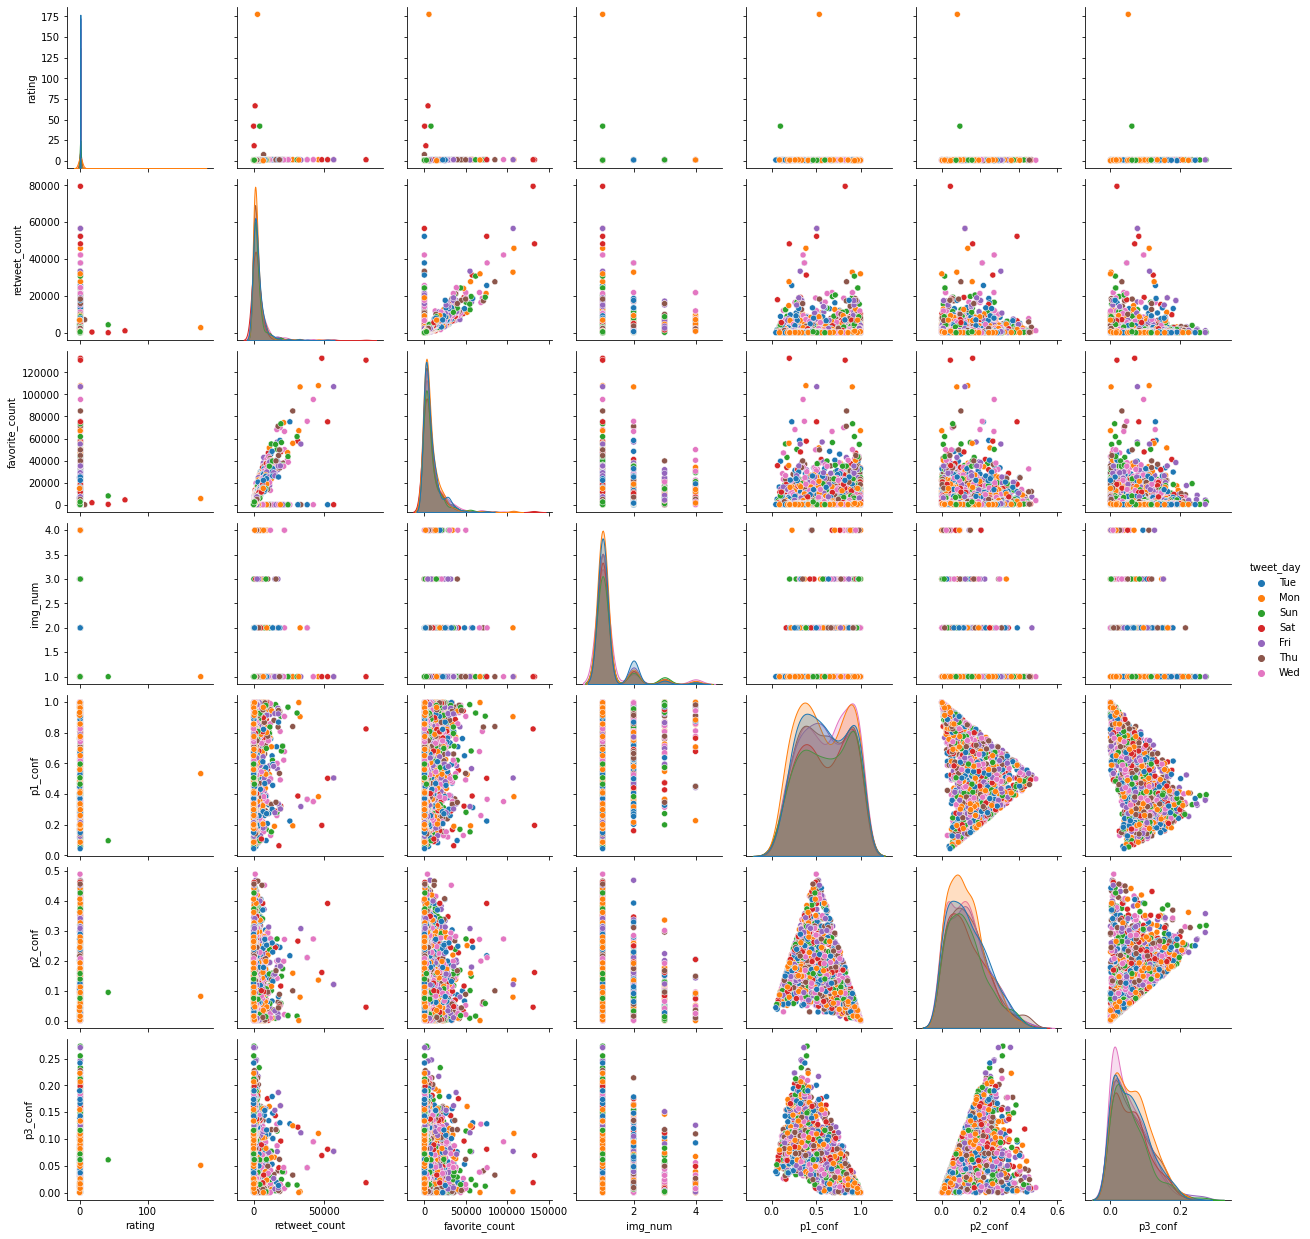

In [51]:
sns.pairplot(df_master, vars=["rating", "retweet_count", "favorite_count", "img_num", "p1_conf", "p2_conf", "p3_conf"], hue="tweet_day");

> The key takeaay from this chart is the relationship between `retweet_count` and `favorite_count`. This is later corroborated by the correlation table below which show a positive strenght of `0.703`. Knowing that the correlation coefficient lies between 0(no correlation) to 1(perfect correlation) this value is close to 1 which makes it a very good correlation. 

In [52]:
#Correlation table rounded to the nearest three decimals
df_master.corr().round(3)

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.000,0.047,0.390,0.528,0.205,0.101,0.003,-0.043
rating,0.047,1.000,0.010,0.008,0.001,-0.009,-0.013,-0.005
retweet_count,0.390,0.010,1.000,0.703,0.106,0.045,-0.009,-0.036
favorite_count,0.528,0.008,0.703,1.000,0.132,0.076,-0.023,-0.053
img_num,0.205,0.001,0.106,0.132,1.000,0.203,-0.160,-0.139
p1_conf,0.101,-0.009,0.045,0.076,0.203,1.000,-0.512,-0.710
p2_conf,0.003,-0.013,-0.009,-0.023,-0.160,-0.512,1.000,0.479
p3_conf,-0.043,-0.005,-0.036,-0.053,-0.139,-0.710,0.479,1.000


## Insight 3

3. Learn which day had higher retweets and favourites

> In this section we shall first group the data into the sum of retweets and favorites made for a tweet and the days these tweet were made while sorting them by decending other. After that a `def` function for our charts will be created to reduce repetition of codes.

In [53]:
df_master_rf=df_master.groupby(["tweet_day"],as_index=False)["retweet_count", "favorite_count"].sum()
df_master_rf.sort_values(by=["retweet_count"], ascending = False).head(7)

<ipython-input-53-84dcee75ef6f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_master_rf=df_master.groupby(["tweet_day"],as_index=False)["retweet_count", "favorite_count"].sum()


,tweet_day,retweet_count,favorite_count
6,Wed,1306678,3180867
5,Tue,1179251,2846694
1,Mon,1116120,3063019
0,Fri,1030952,2588285
2,Sat,991830,2477944
4,Thu,960236,2508595
3,Sun,864866,2357196


In [54]:
#Creating a function for our chart
def top_rt(value1,value2,order):
    result1=df_master_rf.sort_values(value1, ascending = order).head(10)
    pl=sns.barplot(y=value2,x=value1,data=result1)
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result1,pl,title,yl,xl

## Retweets Counts by day of tweets in decending order

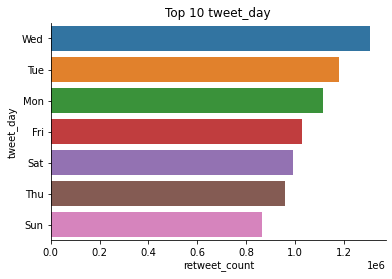

In [55]:
#plot for top retweet counts by day of week
top_rt('retweet_count','tweet_day', False)
sns.despine()

> From the horizontal bar chart above, their were higher number of retweets made on wednesday(midweek) this is next to retweets made on tuesday and monday. Surprisingly Sunday which is a weekend came last. #WOW 

## Retweets Counts by day of tweets in decending order

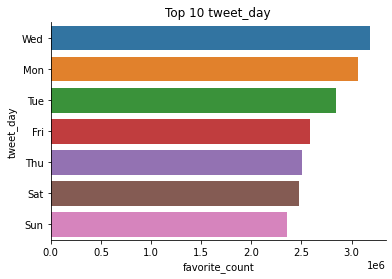

In [56]:
#plot for top favourite counts by day of week
top_rt('favorite_count','tweet_day', False)
sns.despine()

> I have seen shocking stories about tweets but sunday coming last twice in a row was one of it.
Wednessday still maintained top spot this time followed closesly by mondays.

Next time i am making a post on wednesday.